In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
plt.style.use("ggplot")

In [130]:
df = pd.read_csv('ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


### Country Codes CSV for Map Visualization

In [131]:
country_codes = pd.read_csv('countries_codes_and_coordinates.csv')
country_codes.head(5)
country_codes.drop(columns=['Numeric code', 'Latitude (average)', 'Longitude (average)'], inplace=True)
country_codes.head(5)

,Country,Alpha-2 code,Alpha-3 code
0,Afghanistan,"""AF""","""AFG"""
1,Albania,"""AL""","""ALB"""
2,Algeria,"""DZ""","""DZA"""
3,American Samoa,"""AS""","""ASM"""
4,Andorra,"""AD""","""AND"""


## Splitting the Data

In [132]:
df_train, df_test = train_test_split(df)

In [133]:
print('Training set: \n', "Rows: ", df_train.shape[0], "\tColumns: ", df_train.shape[1])
print('Test set: \n', "Rows: ", df_test.shape[0], "\tColumns: ", df_test.shape[1])

Training set: 
 Rows:  2816 	Columns:  11
Test set: 
 Rows:  939 	Columns:  11


## Data Exploration

### General Data 

In [134]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2816 entries, 1629 to 2555
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2816 non-null   int64 
 1   experience_level    2816 non-null   object
 2   employment_type     2816 non-null   object
 3   job_title           2816 non-null   object
 4   salary              2816 non-null   int64 
 5   salary_currency     2816 non-null   object
 6   salary_in_usd       2816 non-null   int64 
 7   employee_residence  2816 non-null   object
 8   remote_ratio        2816 non-null   int64 
 9   company_location    2816 non-null   object
 10  company_size        2816 non-null   object
dtypes: int64(4), object(7)
memory usage: 264.0+ KB


### Making minor adjustments to the columns

In [135]:
df_train.columns = df_train.columns.str.replace('_', ' ')
df_test.columns = df_test.columns.str.replace('_', ' ')
df_train.columns

Index(['work year', 'experience level', 'employment type', 'job title',
       'salary', 'salary currency', 'salary in usd', 'employee residence',
       'remote ratio', 'company location', 'company size'],
      dtype='object')

### Checking for null values

In [136]:
df_train.isnull().sum()

work year             0
experience level      0
employment type       0
job title             0
salary                0
salary currency       0
salary in usd         0
employee residence    0
remote ratio          0
company location      0
company size          0
dtype: int64

### Getting Cat and Num columns

In [137]:
def get_catcolumns(dataframe):
    categorical_columns = []
    
    for i in dataframe.columns:
        if(dataframe[i].dtype != np.float64 and dataframe[i].dtype != np.int64):
            categorical_columns.append(i)

    return categorical_columns

def get_numcolumns(dataframe):
    numerical_columns = []
    
    for i in dataframe.columns:
        if(dataframe[i].dtype == np.float64 or dataframe[i].dtype == np.int64):
            numerical_columns.append(i)
    
    return numerical_columns
cat_columns = get_catcolumns(df_train)
num_columns = get_numcolumns(df_train)
print('Cat:',cat_columns, '\n Num:', num_columns)

Cat: ['experience level', 'employment type', 'job title', 'salary currency', 'employee residence', 'company location', 'company size'] 
 Num: ['work year', 'salary', 'salary in usd', 'remote ratio']


## EDA

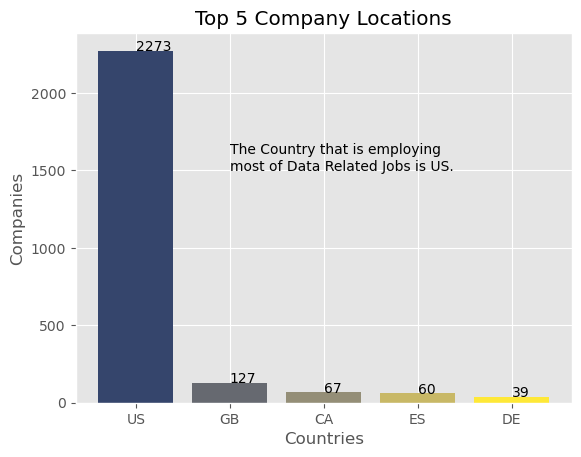

In [138]:
top_5_locations = df_train['company location'].value_counts().sort_values(ascending=False)[:5]
locations = top_5_locations.index

fig = plt.figure()
ax = plt.axes()
cmap = plt.get_cmap('cividis')
colors = cmap([0.2, 0.4, 0.6, 0.8, 1])

for i,j in zip(locations,top_5_locations):
    ax.annotate(str(j),xy=(i,j))
    
ax.bar(locations,top_5_locations, color=colors)
ax.set(title='Top 5 Company Locations', xlabel='Countries', ylabel='Companies')

#Insight Text

ax.annotate(
    f'''The Country that is employing 
most of Data Related Jobs is {locations[0]}.''',xy=(1,1500)
);

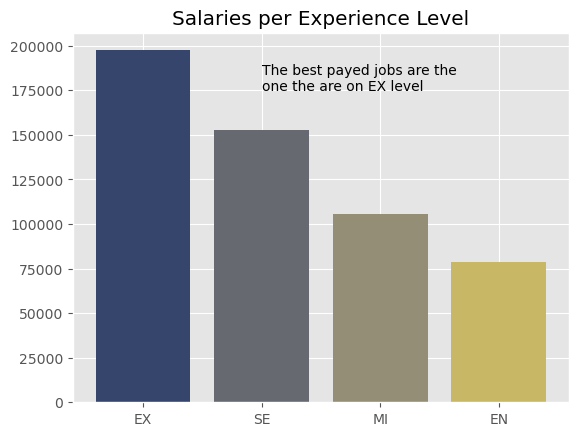

In [139]:
mean_salaries_exp = df_train.groupby('experience level')['salary in usd'].mean().sort_values(ascending=False)
index= mean_salaries_exp.index

fig = plt.figure()
ax = plt.axes()
cmap = plt.get_cmap('cividis')
colors = cmap([0.2, 0.4, 0.6, 0.8])

ax.bar(x=index, height=mean_salaries_exp, color=colors)
ax.set(title='Salaries per Experience Level')
text = f'''The best payed jobs are the 
one the are on {index[0]} level'''
ax.text(1, 175000, text, fontsize = 10);

Graph for most wanted Jobs

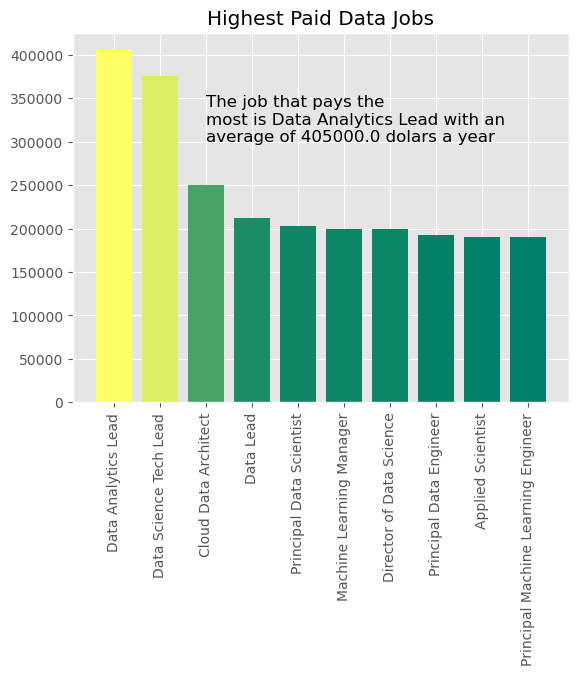

In [140]:
mean_salary_jobs = df_train.groupby('job title')['salary in usd'].mean().sort_values(ascending=False)[:10]
job_titles = mean_salary_jobs.index

# scale data for cmap
denominator = max(mean_salary_jobs) - min(mean_salary_jobs)
scaled_data = [(datum-min(mean_salary_jobs))/denominator for datum in mean_salary_jobs]

fig = plt.figure()
ax = plt.axes()

#Colors
colors = []
cmap = plt.get_cmap('summer')

for decimal in scaled_data:
    colors.append(cmap(decimal))
    
#Rotating X Labels
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
#Text
ax.set(title='Highest Paid Data Jobs')

text = f'''The job that pays the 
most is {job_titles[0]} with an 
average of {mean_salary_jobs[0]} dolars a year'''

ax.text(2,300000, text, fontsize=12)

#Showing the Graph
ax.bar(job_titles, mean_salary_jobs, color=colors);


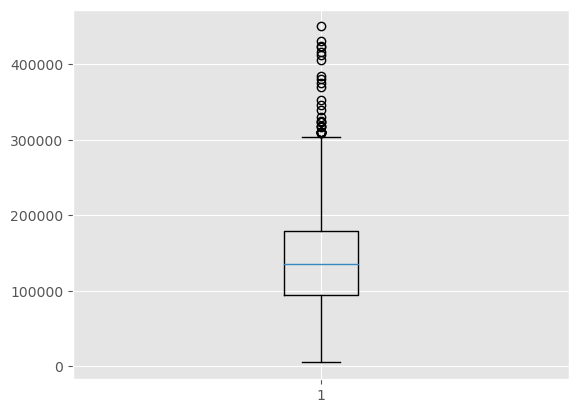

In [141]:
fig = plt.figure()
ax = plt.axes()

ax.boxplot(df_train['salary in usd']);

### Distribution of Data

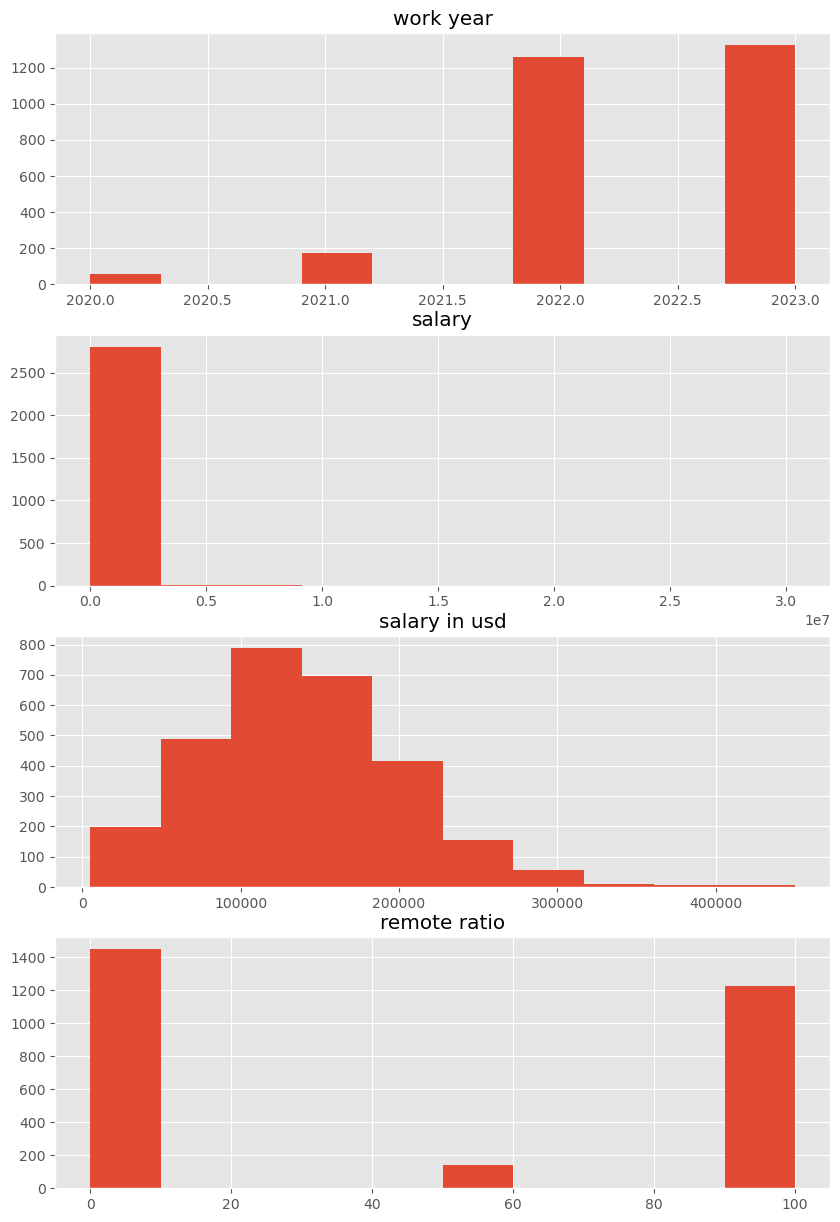

In [173]:
fig, ax = plt.subplots(4, figsize=(10, 15))

for i in range(len(num_columns)):
    ax[i].hist(df_train[num_columns[i]])
    ax[i].set(title=num_columns[i])

## Data Preparation and Feature Engineering for the models

- Select Target Label in this case the target label will be salaries in dolars
- Remove Salary column and Currency column
- Normalize Numerical Data
- OneHot Encode Categorical Data


### Libraries


In [179]:
y_train = df_train['salary in usd']
y_test = df_test['salary in usd']
x_train = df_train.drop(columns=['salary in usd', 'salary','salary currency'])
x_test = df_test.drop(columns=['salary in usd', 'salary','salary currency'])


1629     87000
1216    160000
1297     51962
3231    159000
3741    118000
         ...  
1263    235000
633     239748
3669     40038
1080    126000
2555    345600
Name: salary in usd, Length: 2816, dtype: int64